In [1]:
# HW - compute the spectogram of a classical music song, or a song of your choice
# see if you can classify jazz vs classical vs pop music

In [11]:
import scipy
import scipy.io
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import sounddevice as sd

In [ ]:
# classical song - Chopin's Marche Funèbre (Funeral March) piano sonata i - VI 
# pop song - ghost town by kanye west
# jazz song - Oleo https://www.youtube.com/watch?v=970VkmWa6IY 3:48 I - VI7 - ii - V

In [3]:
os.getcwd()

'c:\\Users\\itsjo\\Documents\\repos\\data-driven-physics\\dimensionality_reduction_and_transforms'

In [4]:
sampling_rate = 24000
y, sr = librosa.load('chopin.mp3', sr=sampling_rate)

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


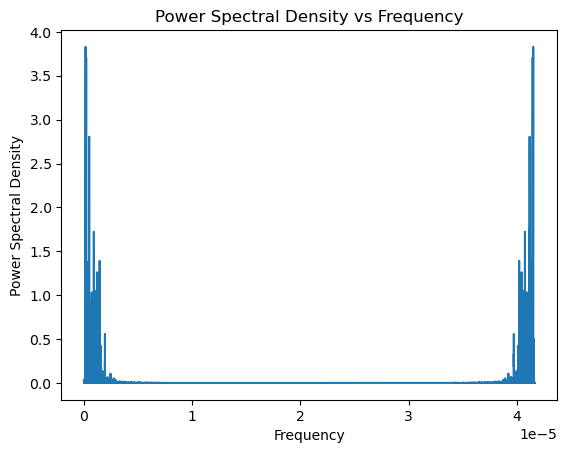

In [99]:
# computing fft

n = len(y) # something may be wrong with this
fft = np.fft.fft(y)
PSD = fft * np.conj(fft) / n
freq = (1/(sr*n)) * np.arange(n) # create x-axis of frequencies


# plotting PSD vs frequency
plt.plot(freq, PSD)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density vs Frequency')
plt.show()

In [240]:
# use PSD to filter out noise -> stuff with fourier coefficients under certain threshold zerod
indices = PSD > 0.6 # threshold
PSDclean = PSD * indices
fhat = indices * fft
ffilt = np.fft.ifft(fhat).astype('float')

C:\Users\itsjo\AppData\Local\Temp\ipykernel_32792\1213057110.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ffilt = np.fft.ifft(fhat).astype('float')


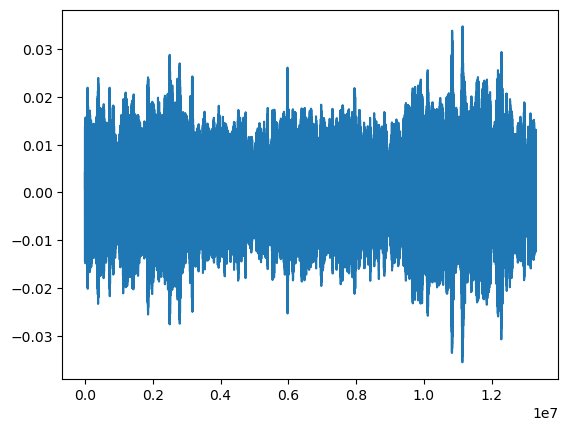

In [207]:
# taking out the noise using FFT power spectrum
plt.plot(ffilt)

plt.show()

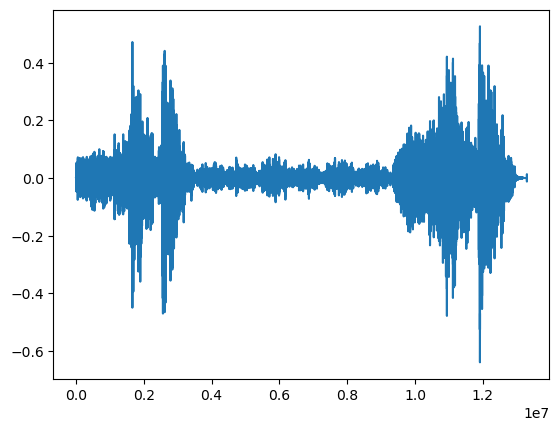

In [208]:
# taking out the noise using FFT power spectrum
plt.plot(y)

plt.show()

In [220]:
# computing the fourier transform
D = librosa.stft(y[0:100000], n_fft=5000, win_length=5000)

# converting to log Db scale so we can see the different notes
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [241]:
D_filt = librosa.stft(ffilt[0:100000], n_fft=5000, win_length=5000)
DB_filt = librosa.amplitude_to_db(np.abs(D_filt), ref=np.max)

In [222]:
# use this to plot frequencies
freq = lambda n: 440 * (2 ** (1/12)) ** (n - 49)
# print(freq(40))  # frequency of 40th key = C -> 261.63 Hz which is right

x = range(37, 73)

freqs = [freq(n) for n in x]

notes = ["A", "Bb", "B", "C", "Db", "D", "Eb", "E", "F", "Gb", "G", "Ab"]
notes *= 3

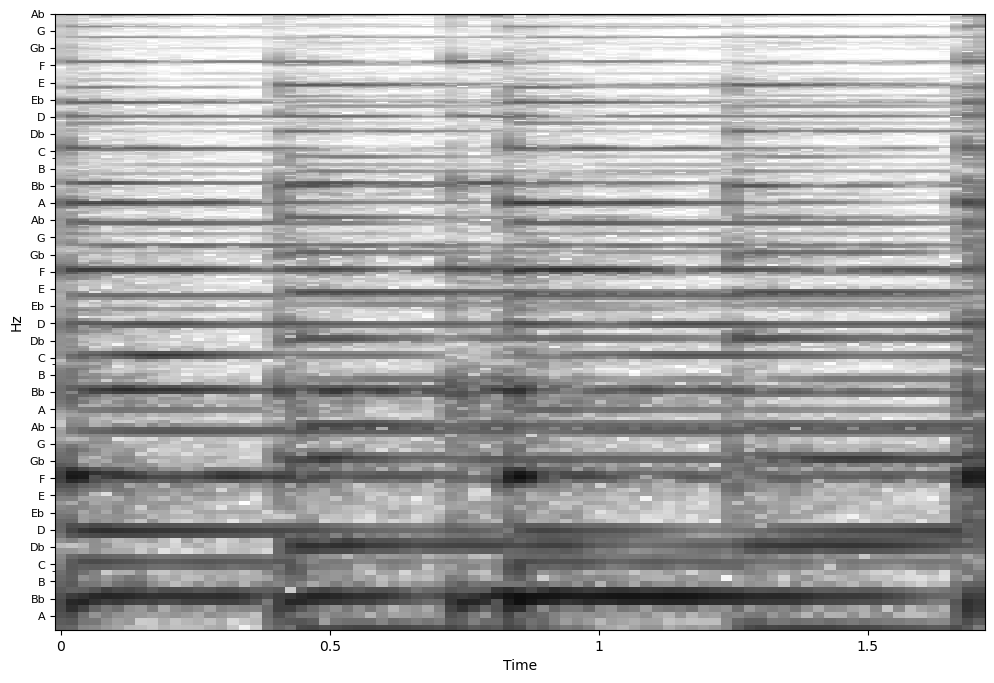

In [223]:
# Display spectogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log', cmap='Greys')

plt.ylim(210, 1000)

plt.yticks(freqs, notes, fontsize=8)


plt.show()

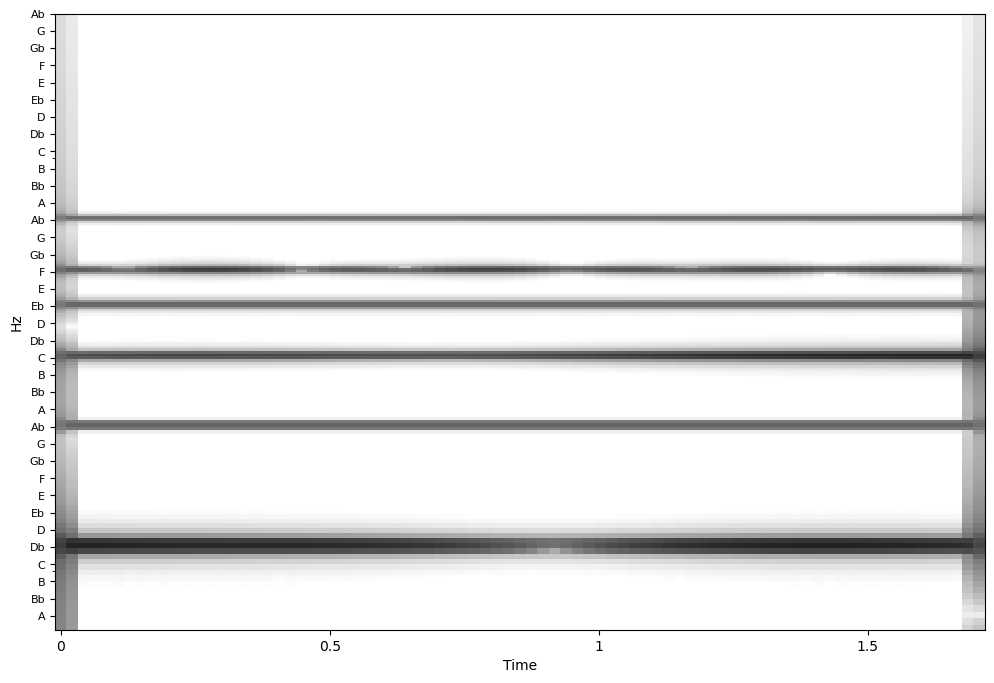

In [242]:
# Display filtered spectogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB_filt, sr=sr, x_axis='time', y_axis='log', cmap='Greys')

plt.ylim(210, 1000)

plt.yticks(freqs, notes, fontsize=8)


plt.show()

In [217]:
np.size(y)

13297372

In [226]:
sd.play(ffilt[0:100000], sr)

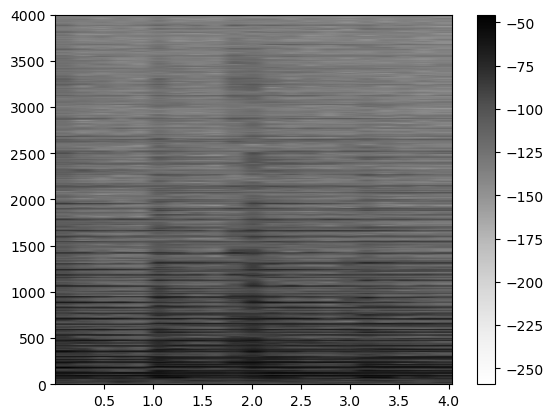

In [216]:
plt.specgram(y[0:100000], NFFT=5000, Fs=sr, noverlap=400, cmap="Greys")
plt.colorbar()
plt.ylim(0, 4000)
plt.show()